## Baseline Scenario

#### Fixed Split:

- Bandwidth: 75% to user equipment, 25% to sensors
- Computational power: 75% to user equipment, 25% to sensors

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

# predefined smart city scenario
from mobile_env.scenarios.smart_city import MComSmartCity

In [2]:
env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 5 users, 20 sensors and 1 cells.


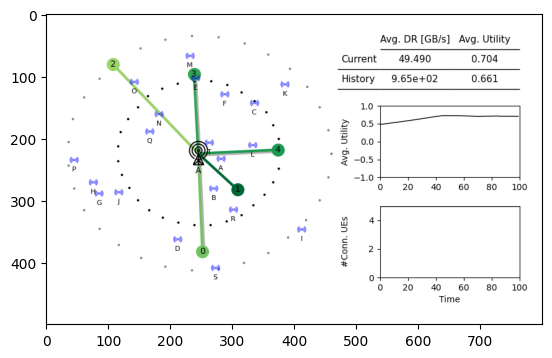

In [3]:
from IPython import display

# run the simulation for 20 time steps
done = False
obs, info = env.reset()

total_episode_reward = 0
total_reward_over_time = []  # List to store the reward at each time step

for _ in range(100):
    # here, use random dummy actions by sampling from the action space
    dummy_action = (0.75, 0.75)
    obs, reward, terminated, truncated, info = env.step(dummy_action)
    
    # accumulate total reward for the episode
    total_episode_reward += reward
    total_reward_over_time.append(total_episode_reward) 

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

plt.close()

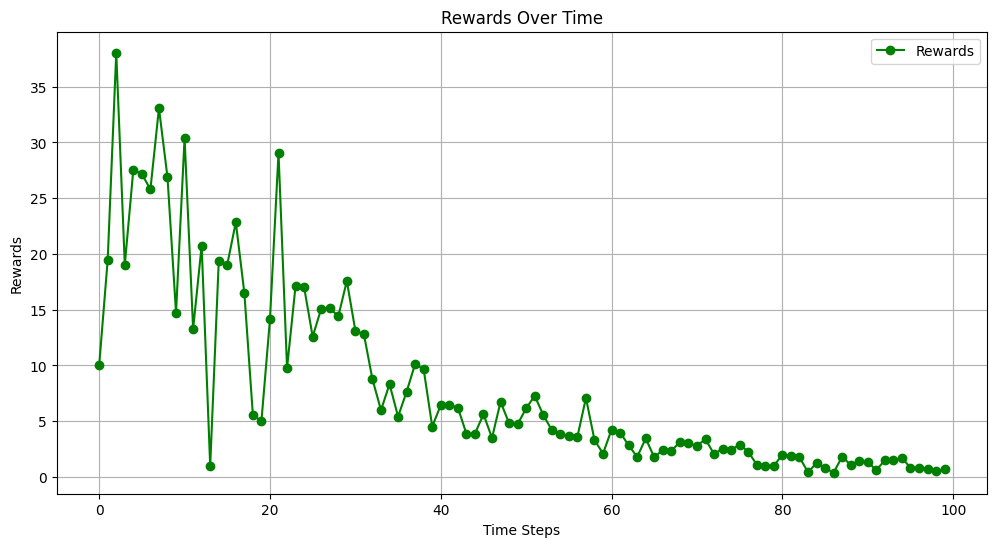

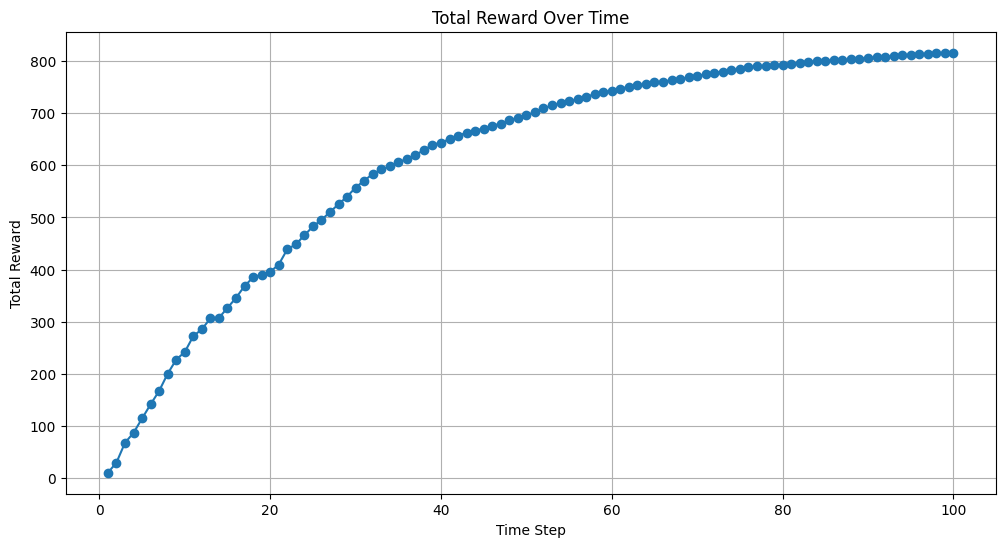

In [4]:
env.plot_rewards()

# Plot the reward over time
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(total_reward_over_time) + 1), total_reward_over_time, marker='o')
plt.title('Total Reward Over Time')
plt.xlabel('Time Step')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

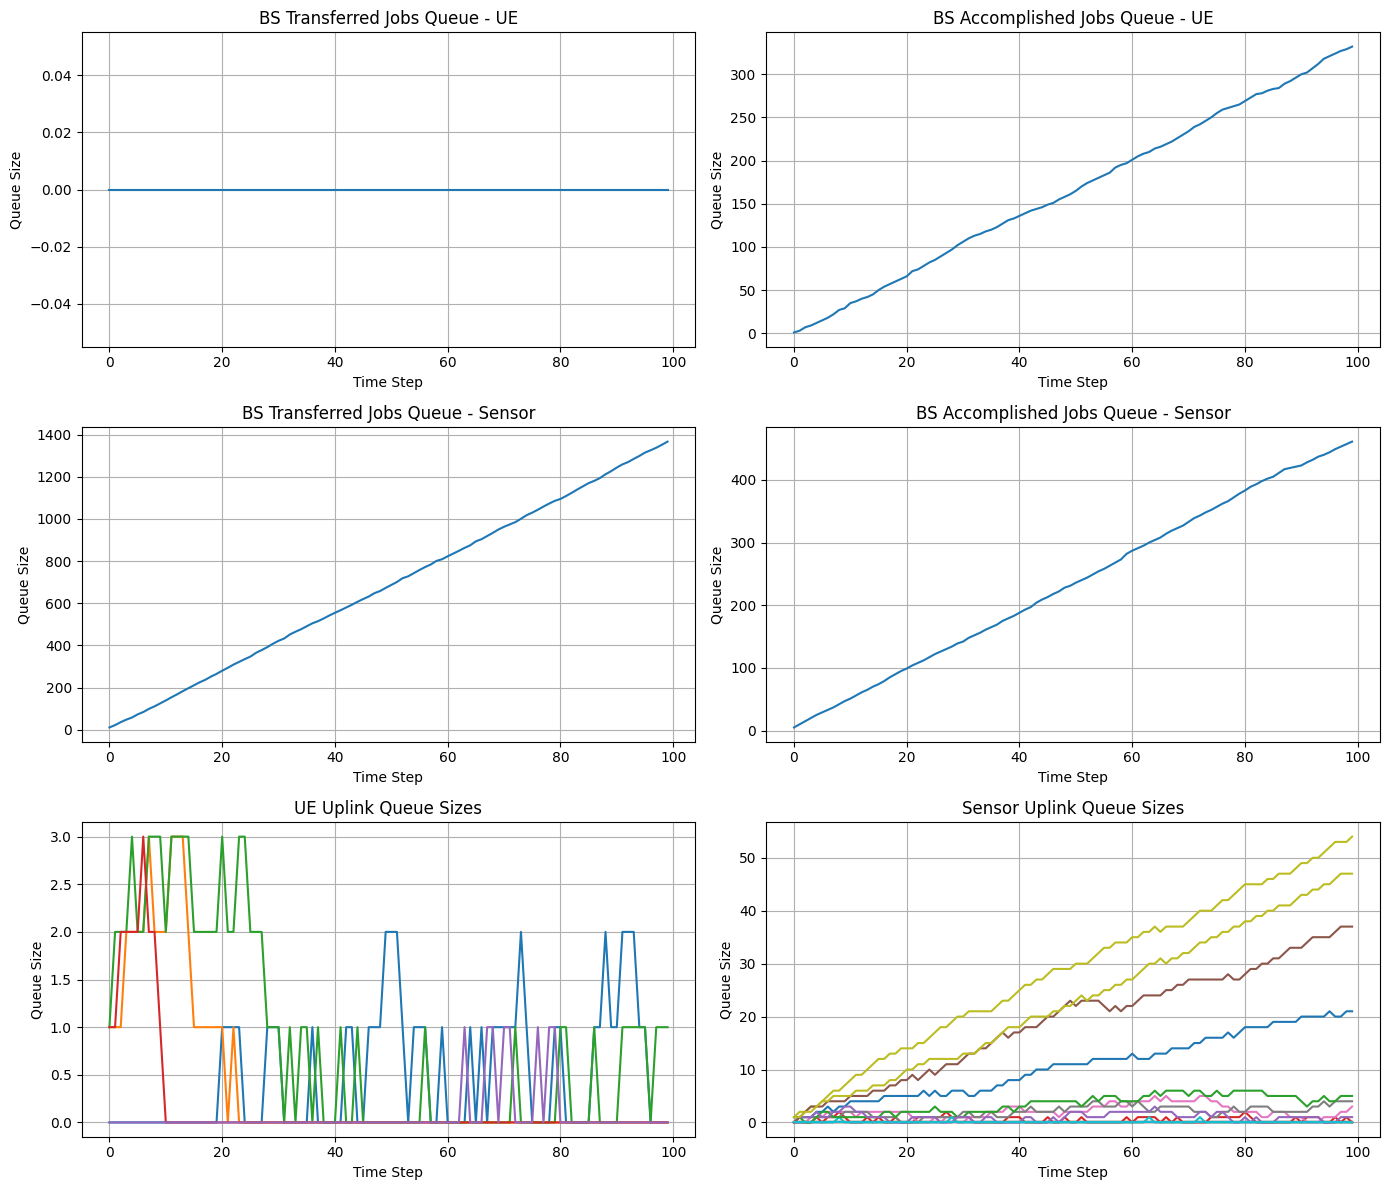

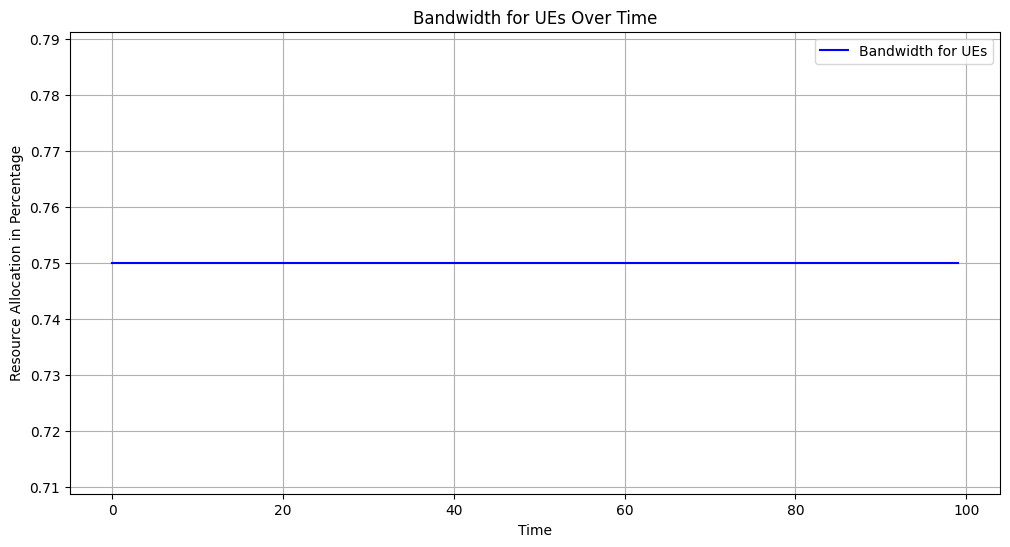

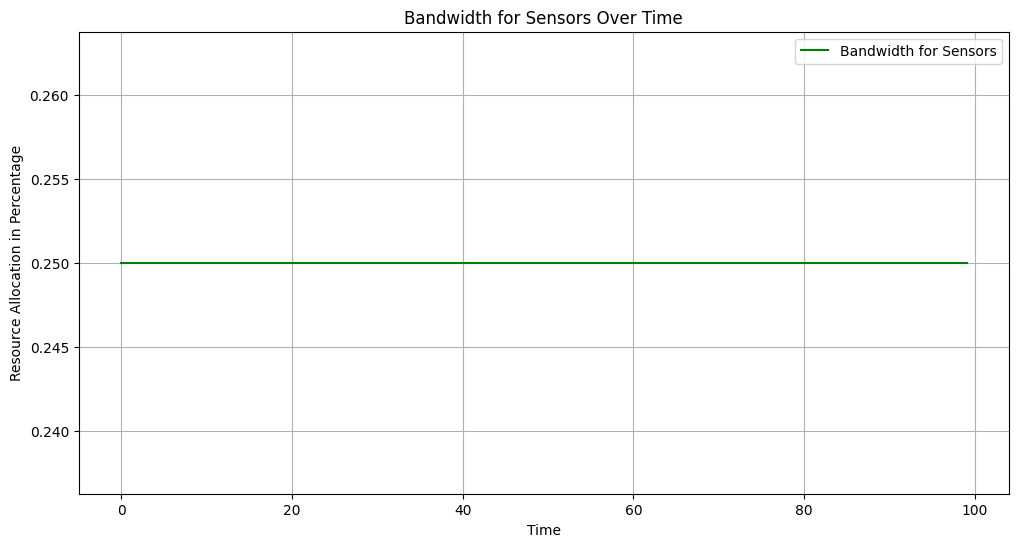

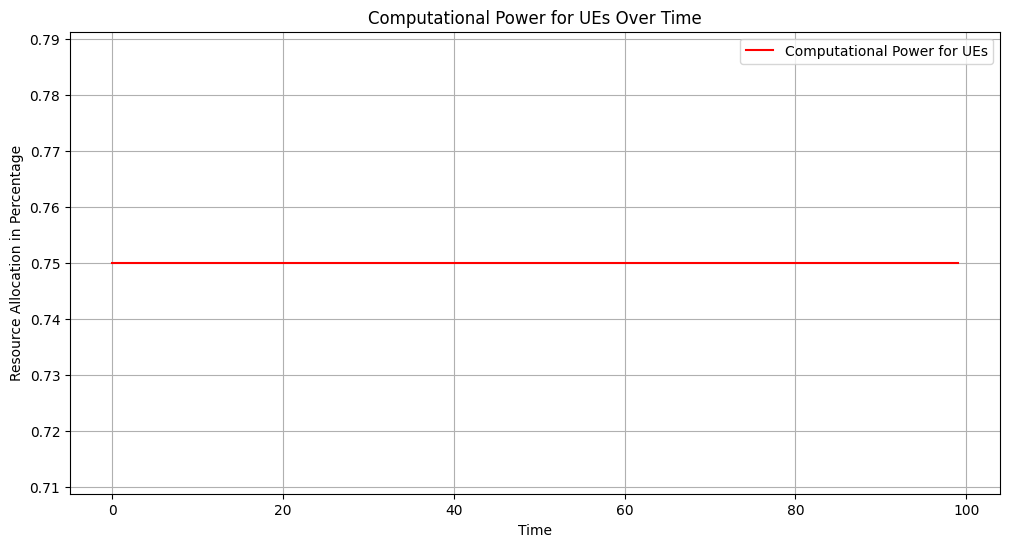

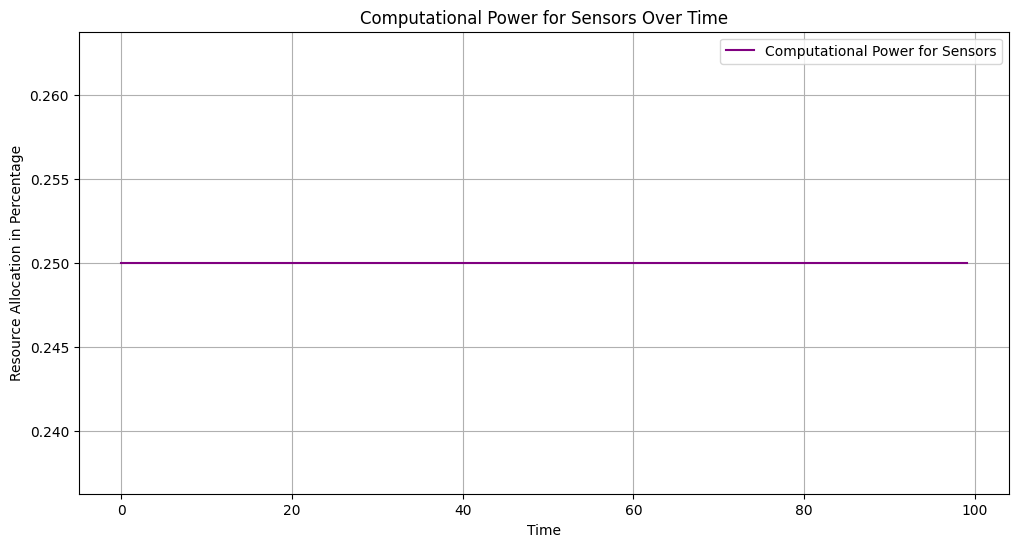

In [5]:
# Plot other environment metrics
env.plot_queue_sizes()
env.plot_resource_allocations()

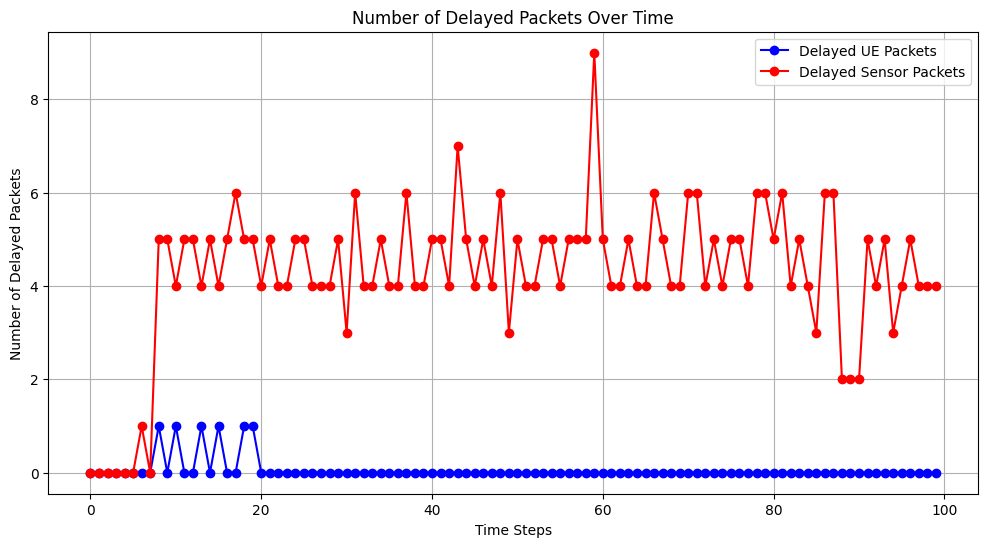

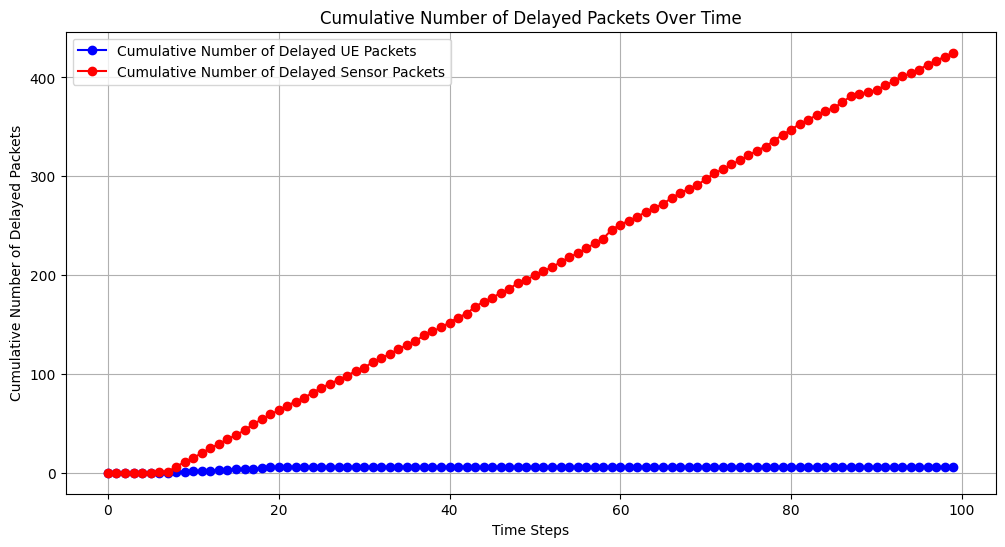

In [6]:
env.plot_delayed_packets()
env.plot_total_delayed_packets()

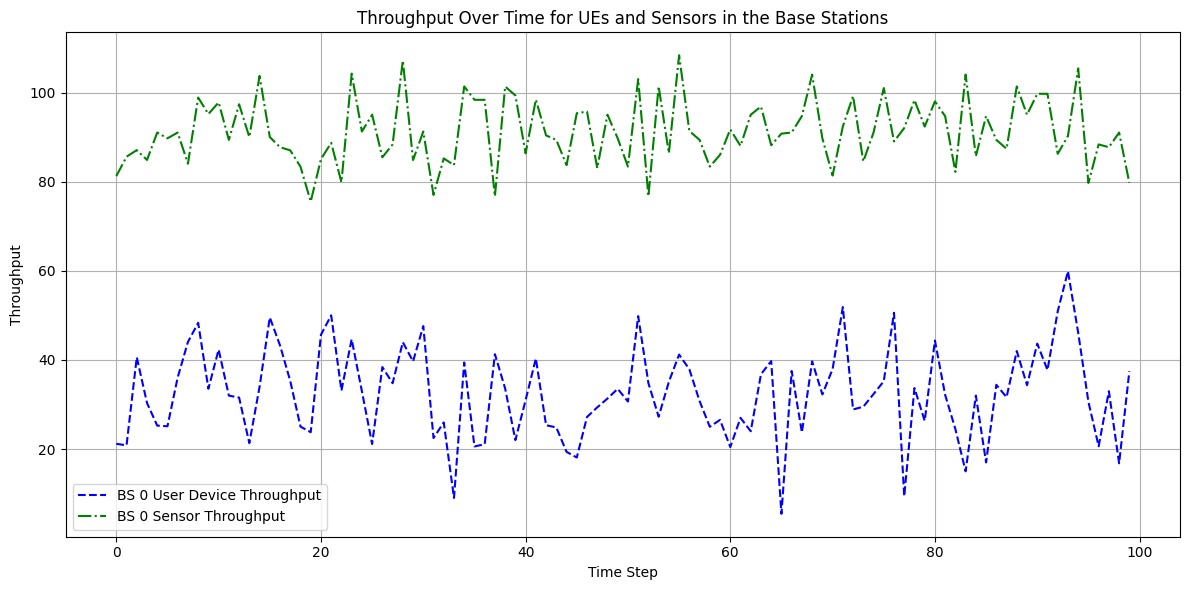

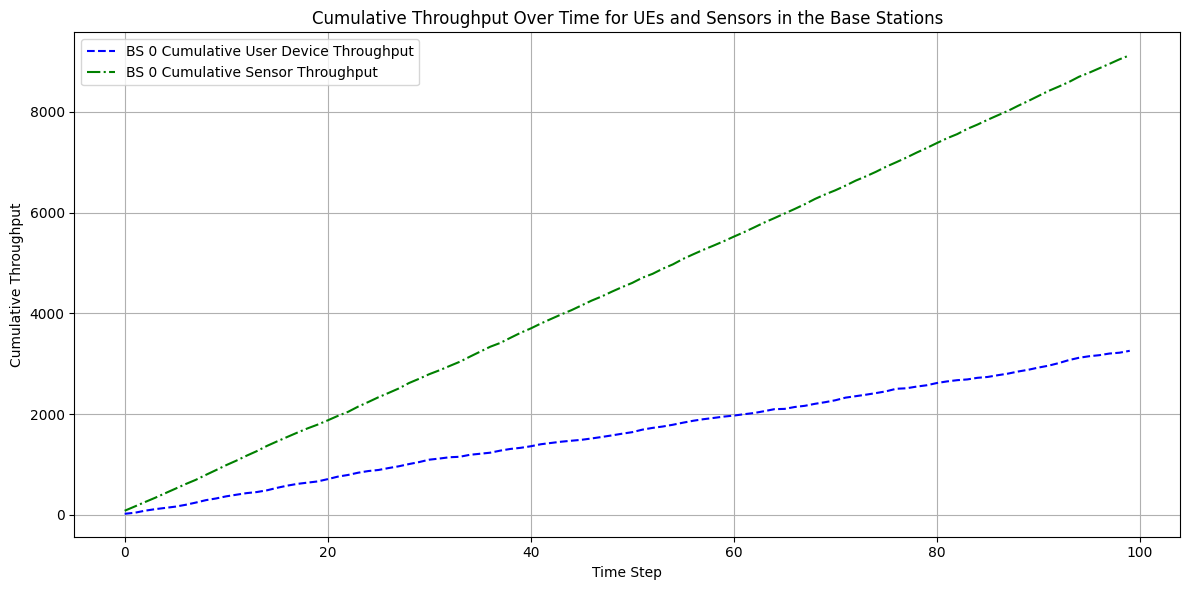

In [7]:
env.plot_throughput()
env.plot_cumulative_throughput()

In [8]:
import tracemalloc

tracemalloc.start()

# Run the simulation for 100 episodes
num_episodes = 30
rewards_per_episode = []  # Store total rewards for each episode

for episode in range(num_episodes):
    obs, info = env.reset()  # Reset environment for each episode
    total_episode_reward = 0  # Reset reward for the new episode
    
    print(f"Starting Episode {episode + 1}")
    
    for step in range(100):  # Limit each episode to 100 timesteps
        # Use random dummy actions
        dummy_action = (0.75, 0.75)
        obs, reward, terminated, truncated, info = env.step(dummy_action)

        # Accumulate total reward for the episode
        total_episode_reward += reward
        
        # Check if the episode is over
        if terminated or truncated:
            print(f"Episode {episode + 1} ended after {step + 1} steps.")
            break
    
    print(f"Total reward for Episode {episode + 1}: {total_episode_reward}")
    rewards_per_episode.append(total_episode_reward)  # Store total reward for this episode


snapshot = tracemalloc.take_snapshot()
print(snapshot.statistics('lineno'))

Starting Episode 1
Episode 1 ended after 100 steps.
Total reward for Episode 1: 792.66371807598
Starting Episode 2
Episode 2 ended after 100 steps.
Total reward for Episode 2: 942.3998879685143
Starting Episode 3
Episode 3 ended after 100 steps.
Total reward for Episode 3: 703.2404972384338
Starting Episode 4
Episode 4 ended after 100 steps.
Total reward for Episode 4: 648.9854928119631
Starting Episode 5
Episode 5 ended after 100 steps.
Total reward for Episode 5: 919.3981980750382
Starting Episode 6
Episode 6 ended after 100 steps.
Total reward for Episode 6: 864.8880008639372
Starting Episode 7
Episode 7 ended after 100 steps.
Total reward for Episode 7: 921.4299521505989
Starting Episode 8
Episode 8 ended after 100 steps.
Total reward for Episode 8: 931.9890576785692
Starting Episode 9
Episode 9 ended after 100 steps.
Total reward for Episode 9: 945.7811701682954
Starting Episode 10
Episode 10 ended after 100 steps.
Total reward for Episode 10: 891.4850376654814
Starting Episode 11

In [12]:
snapshot = tracemalloc.take_snapshot()
top_stats = snapshot.filter_traces((
    tracemalloc.Filter(True, "/Users/elifohri/Documents/mobile-env/"),  # Include project files
    tracemalloc.Filter(False, "/Library/"),  # Exclude system library files
))
for stat in top_stats.statistics('lineno'):
    print(stat)


In [14]:
# Sort statistics by size
sorted_stats = sorted(snapshot.statistics('lineno'), key=lambda stat: stat.size, reverse=True)

# Print the top 10 largest allocations
for stat in sorted_stats[:30]:
    print(stat)


/Users/elifohri/Documents/mobile-env/mobile_env/core/job_generator.py:64: size=1477 KiB, count=4726, average=320 B
/Users/elifohri/Library/Python/3.9/lib/python/site-packages/matplotlib/lines.py:389: size=144 KiB, count=67, average=2208 B
/Users/elifohri/Library/Python/3.9/lib/python/site-packages/matplotlib/text.py:314: size=110 KiB, count=51, average=2208 B
/Users/elifohri/Library/Python/3.9/lib/python/site-packages/pandas/core/internals/concat.py:177: size=82.8 KiB, count=20, average=4242 B
/Users/elifohri/Documents/mobile-env/mobile_env/core/data_transfer.py:182: size=70.3 KiB, count=3000, average=24 B
/Users/elifohri/Documents/mobile-env/mobile_env/core/data_transfer.py:180: size=70.3 KiB, count=2998, average=24 B
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/tracemalloc.py:558: size=70.1 KiB, count=1339, average=54 B
/Users/elifohri/Documents/mobile-env/mobile_env/core/job_generator.py:31: size=57.6 KiB, count=2107, average=28

In [15]:
import csv

snapshot = tracemalloc.take_snapshot()
top_stats = snapshot.statistics('lineno')

with open('memory_usage.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["Filename", "Line", "Size (bytes)", "Count"])
    for stat in top_stats:
        frame = stat.traceback[0]
        writer.writerow([frame.filename, frame.lineno, stat.size, stat.count])


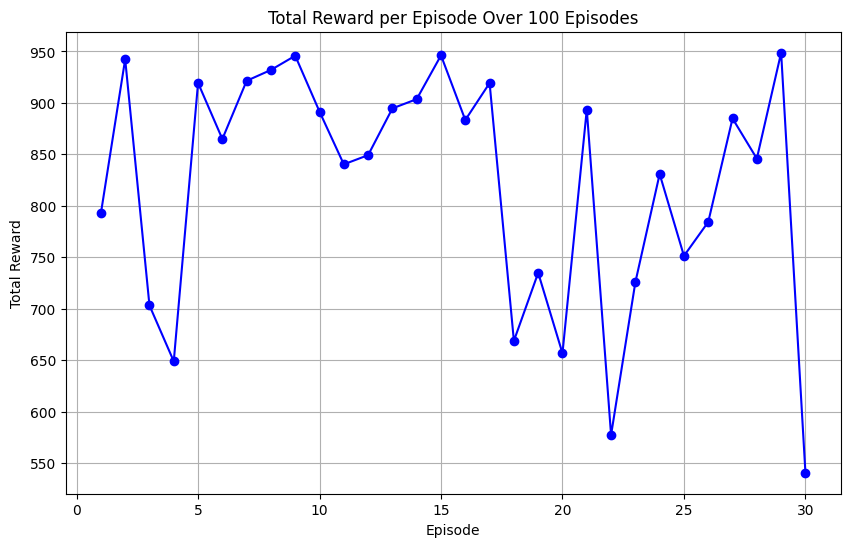

In [9]:
import matplotlib.pyplot as plt

# Plotting the total reward per episode
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), rewards_per_episode, marker='o', linestyle='-', color='b')
plt.title('Total Reward per Episode Over 100 Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()